In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib import units
from tensorflow.keras.optimizers import Adam
from random import random

In [2]:
opt=Adam(learning_rate=0.01)
ds = tf.keras.datasets.fashion_mnist
(dxtrain,dytrain),(dxtest,dytest)=ds.load_data()
dxtrain=tf.keras.utils.normalize(dxtrain,axis=1)
dxtest=tf.keras.utils.normalize(dxtest,axis=1)
labeldes={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [3]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dense(units=64,activation="sigmoid"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(dxtrain,dytrain,epochs=10,validation_data=(dxtest,dytest))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5855 - accuracy: 0.7853 - val_loss: 0.4633 - val_accuracy: 0.8347
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3980 - accuracy: 0.8558 - val_loss: 0.3892 - val_accuracy: 0.8607
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3556 - accuracy: 0.8709 - val_loss: 0.3717 - val_accuracy: 0.8675
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3299 - accuracy: 0.8796 - val_loss: 0.3677 - val_accuracy: 0.8648
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3086 - accuracy: 0.8856 - val_loss: 0.3563 - val_accuracy: 0.8711
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2918 - accuracy: 0.8928 - val_loss: 0.3476 - val_accuracy: 0.8728
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2771 - accuracy: 0.8970 - val_loss: 0.3294 - val_accuracy:

In [4]:
model.save("../vs/data/model/fmnist.model")

INFO:tensorflow:Assets written to: ../vs/data/model/fmnist.model\assets


In [5]:
model = tf.keras.models.load_model("../vs/data/model/fmnist.model")

In [6]:
labeldes={0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

index number 173
real Trouser
pre Trouser


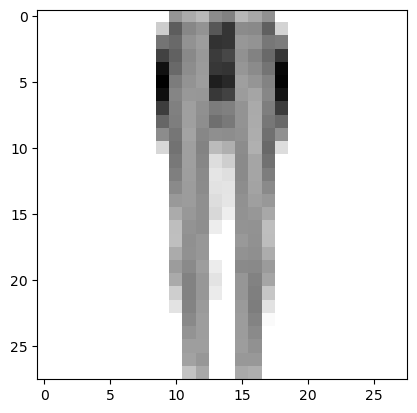

In [7]:
i=int(random()*10000)
result=model.predict(np.array([dxtest[i]]))
print("index number",i)
print("real",labeldes[dytest[i]])
print("pre",labeldes[np.argmax(result)])
plt.imshow(dxtest[i],cmap=plt.cm.binary)
plt.show()